### Lab1 Linear regression from sractch

Abderrhamane ADDA and Zhan CHEN

There are 3 parts in this notebook. 
At the first time, we implement linear regression from scratch. 
Secondly, we prepare the data set for machine learning(feature engineering).
And lastly, we use the prepared dataset for machine learning using respectivly linear regression from scratch, sklearn library, and normal equation.

#### Part 1 : implementation of linear regression from scratch

In [62]:
import numpy as np

def costFunction(X, y, theta):

    m = len(y)
    return 1/(2*m) * np.sum((np.dot(X, theta) - y)**2)

def gradientDescent(X, y, theta, alpha, num_iters):
    m = y.shape[0]

    J_history = np.zeros((num_iters, 1))
    for iter in range(num_iters):
        
        theta = theta - (alpha/m) * (X.T.dot(X.dot(theta) - y))
        J_history[iter] = costFunction(X, y, theta)
    return J_history,theta

def normalizeFeatures(X):
    X_norm = X;
    mu = np.zeros((1,X.shape[1]))
    sigma = np.zeros((1,X.shape[1]))
    for i in range(X.shape[1]):
        mu[0,i] = np.mean(X[:,i]) # mean
        sigma[0,i] = np.std(X[:,i]) # std

    X_norm  = (X - mu) / sigma
    return X_norm

def r2(prediction, y_test):
    sst = np.sum((y_test-y_test.mean())**2)
    ssr = np.sum((prediction-y_test)**2)
    r2 = 1-(ssr/sst)
    return r2

def mse(prediction, y):
    return np.square(prediction-y).mean()

def rmse(prediction, y):
    return np.sqrt(mse(prediction, y))

def predict(weights, x_test):
    y_preds = np.dot(weights.T,x_test.T)
    return y_preds

#### Part 2 : dataset preparation

In [63]:
import pandas as pd
import numpy as np
df = pd.read_csv('Bike Rental UCI dataset.csv')

In [64]:
#convert dayOfWeek to categorical values
dayofweek_in_number = {'Mon':1, 'Tue':2, 'Wed':3, 'Thr':4, 'Fri':5, 'Sat':6,'Sun':7}
df['dayOfWeek'] = df.dayOfWeek.apply(lambda x: dayofweek_in_number[x])

Values in 'season','yr','mnth','hr','holiday','workingday','weathersit','dayOfWeek' variables are categorical
We need to apply get_dummies method to them

In [65]:
#one hot encoding
cat_feautres = ['season','yr','mnth','hr','holiday','workingday','weathersit','dayOfWeek']

for feature in cat_feautres:
    df =pd.get_dummies(df, columns=[feature])


In [66]:
#shuffle the dataset
df = df.reindex(np.random.permutation(df.index))

import math
#we'll make 80% of our rows as train data, and the rest test data.
train_max_row = math.floor(df.shape[0] * .8)
train = df.iloc[:train_max_row]
test = df.iloc[train_max_row:]


print('train',train.shape)
print('test',test.shape)

train (13903, 62)
test (3476, 62)


In [67]:
features = list(df.columns)  #take all columns
features.remove('demand') #then remove demand columns, which is the target
features.remove('days') #we should also remove days
print(features)  #print features to check if they are right
print(len(features))

['temp', 'hum', 'windspeed', 'season_1', 'season_2', 'season_3', 'season_4', 'yr_0', 'yr_1', 'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23', 'holiday_0', 'holiday_1', 'workingday_0', 'workingday_1', 'weathersit_1', 'weathersit_2', 'weathersit_3', 'weathersit_4', 'dayOfWeek_1', 'dayOfWeek_2', 'dayOfWeek_3', 'dayOfWeek_4', 'dayOfWeek_5', 'dayOfWeek_6', 'dayOfWeek_7']
60


now that the dataset is ready, we can do machine learning

#### Part 3 : Machine learning

##### 3.1 Using linear regression from scratch

r2_train = 67.38848863118602 %
r2_test = 67.32280298102734 %


mse_train = 10735.836844016607
mse_test =  10722.451407282691


rmse_train =  103.61388345205775
rmse_test = 103.54927043336757


Text(0.5, 0, 'number of iterations')

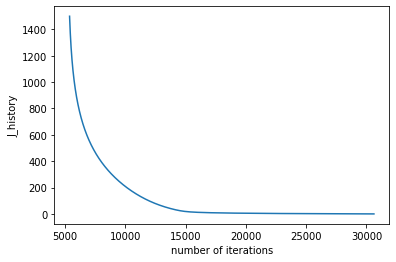

In [68]:
w = np.random.randn(len(features), 1) #initial weights


y_train_values = train['demand'].values
y_train = y_train_values.reshape(-1,1)


y_test_values = test['demand'].values
y_test = y_test_values.reshape(-1,1)


j = costFunction(train[features],y_train,w)


iteration = 1500
learning_rate = 0.03
J_history,weights = gradientDescent(train[features],y_train,w, alpha=learning_rate, num_iters=iteration)


predictions_train_set = predict(weights,train[features].values) 
predictions_test_set = predict(weights,test[features].values)


print('r2_train =',r2(predictions_train_set,train['demand'].values)*100,'%')
print('r2_test =',r2(predictions_test_set,test['demand'].values)*100,'%')

print('\n')

print('mse_train =', mse(predictions_train_set,train['demand'].values))
print('mse_test = ',mse(predictions_test_set,test['demand'].values))

print('\n')

print('rmse_train = ',rmse(predictions_train_set,train['demand'].values))
print('rmse_test =', rmse(predictions_test_set,test['demand'].values))



import matplotlib.pyplot as plt
iterations = range(iteration)
plt.plot(J_history.flatten(),iterations)
plt.ylabel('J_history')
plt.xlabel('number of iterations')


##### 3.2 using sklearn

In [69]:

from sklearn.linear_model import LinearRegression


#now we can use linear regression
lr = LinearRegression(normalize=True)


lr.fit(train[features], train['demand'])

accuracy_train = lr.score(train[features],train['demand'])
print('r2_train =',accuracy_train*100,'%')

accuracy_test = lr.score(test[features],test['demand'])
print('r2_test =',accuracy_test*100,'%')
print('\n')

from sklearn.metrics import mean_squared_error

train_predictions = lr.predict(train[features])
test_predictions = lr.predict(test[features])

train_mse = mean_squared_error(train_predictions, train['demand'])
test_mse = mean_squared_error(test_predictions, test['demand'])

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)


print('mse_train =', train_mse)
print('mse_test = ', test_mse )

print('\n')

print('rmse_train = ',train_rmse)
print('rmse_test =', test_rmse)


r2_train = 68.60739066822096 %
r2_test = 68.44293472654812 %


mse_train = 10334.569535352082
mse_test =  10354.899741081703


rmse_train =  101.6590848638334
rmse_test = 101.75902781120554


##### 3.3 using normal equation

In [70]:
#with normal equation, there is no overfitting problem, so we can use the whole dataset 

X = df[features].values
Y = df['demand'].values

from scipy import linalg

step1 = np.dot(X.T, X)
step2 = np.linalg.pinv(step1)
step3 = np.dot(step2, X.T)
theta = np.dot(step3, Y)

predictions_normal_equation = predict(theta,df[features].values)

print('r2 =',r2(predictions_normal_equation,Y)*100,'%','\n')

print('mse =',mse(predictions_normal_equation,Y),'\n')

print('rmse =',rmse(predictions_normal_equation,Y))

r2 = 68.60413494698592 % 

mse = 10329.103950602952 

rmse = 101.63219937895151


Conclusion : with all the 3 methods, we obtained similar R2, MSE and RMSE, which implies that the linear regression for scratch and the normal equation are well implemented